# Linear Regression Assignment

 #### Problem Statement :
  A US bike-sharing provider **BoomBikes** system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system. Company has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

   They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands.

In [102]:
# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [103]:
# Importing Warnings

import warnings
warnings.filterwarnings('ignore')

## Data Preparation:

In [104]:
# Importing and Reading the data

boombikes = pd.read_csv("day.csv")
boombikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [105]:
# Shape of the data:
boombikes.shape

(730, 16)

In [6]:
boombikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
boombikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
boombikes.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### Findings:
- There are 730 rows and 16 columns.
- There are no null values in the given data.
- **'cnt'** is the target variable for the module as per the data dictionary given.
- **'instant'** is record index which is not useful for analysis and **'dteday'** is date. We have 'yr' and 'mnth' for for analysis hence 'dteday' is not required for analysis.
- We can drop **'instant'** and **'dteday'** columns where are not usefull for analysis.
- We can also drop **'casual'** and **'registered'**. **'cnt'** have combined total of both casual and registered.
- From data dictionary i understood that there are some categorial variables which needs to be mapped.

In [9]:
# Droping the columns which are not important for analysis
dropcols = ["instant","dteday","casual","registered"]

boombikes = boombikes.drop(columns=["instant","dteday","casual","registered"] )

In [11]:
# Reading the head of data after dropping the variables:
boombikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


## Exploratory Data Analysis and Visualization

- Now we will explore the data and perform univatiate and byvariate analysis on given data to find some interesting insights.
- We wil Map the categorical variables if required.
- We will analyze independent variables which are affecting the target variable.
- Determine correlation of the variables.

### Analysing the data one after another

In [12]:
# analysiing "season" variable:
boombikes.season.describe()

count    730.000000
mean       2.498630
std        1.110184
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        4.000000
Name: season, dtype: float64

In [13]:
# Value count:
boombikes.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

### Mapping:
- As per the data dictionary there are 4 variables under season: 1:spring, 2:summer, 3:fall, 4:winter.
- This is a categorical variable. We will map the names for further analysis.

In [14]:
# Mapping the season variable
boombikes["season"] = boombikes["season"].map({1:"spring", 2:"summer", 3:"fall", 4:"winter"})
boombikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [16]:
# season wise Mean "cnt"
boombikes.groupby(by="season").cnt.mean().sort_values()

season
spring    2608.411111
winter    4728.162921
summer    4992.331522
fall      5644.303191
Name: cnt, dtype: float64

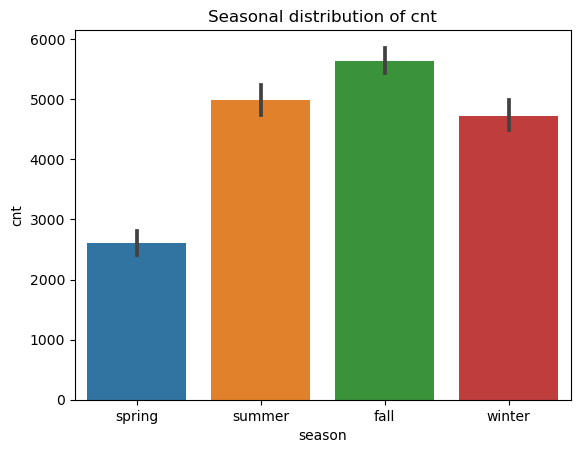

In [17]:
# "Cnt" distribution in all Seasons
sns.barplot(data=boombikes, x="season", y="cnt")
plt.title("Seasonal distribution of cnt")
plt.show()

### Insights:
- Fall season have highest ride count compared to other seasons followed by summer, winter and last spring.

In [18]:
# Value count of "yr" variable:
boombikes.yr.value_counts()

0    365
1    365
Name: yr, dtype: int64

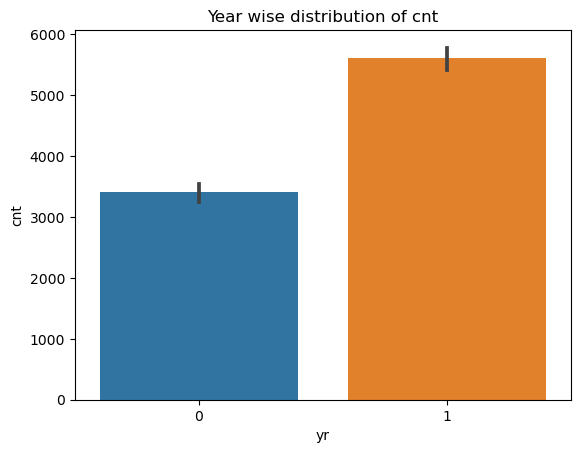

In [19]:
sns.barplot(data=boombikes, x="yr", y="cnt")
plt.title("Year wise distribution of cnt")
plt.show()

### Insights:
- 0:2018 have less number of ride count compared to 1:2019.
- We can say that use of the product have been increased.

In [20]:
# Analysing "mnth" variable:
mnth_wise_cnt = boombikes.groupby(by="mnth").cnt.mean()
mnth_wise_cnt

mnth
1     2176.338710
2     2669.964286
3     3692.258065
4     4484.900000
5     5349.774194
6     5772.366667
7     5563.677419
8     5664.419355
9     5766.516667
10    5199.225806
11    4247.183333
12    3403.806452
Name: cnt, dtype: float64

In [21]:
# Mapping months to categorical variable:
boombikes["mnth"] = boombikes["mnth"].map({1:"Jan" , 2:"Feb" , 3:"Mar" , 4:"Apr" , 5:"May" , 6:"Jun" , 7:"Jul" ,8:"Aug" , 9:"Sep" , 10:"Oct" , 11:"Nov" , 12:"Dec" })


In [22]:
boombikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


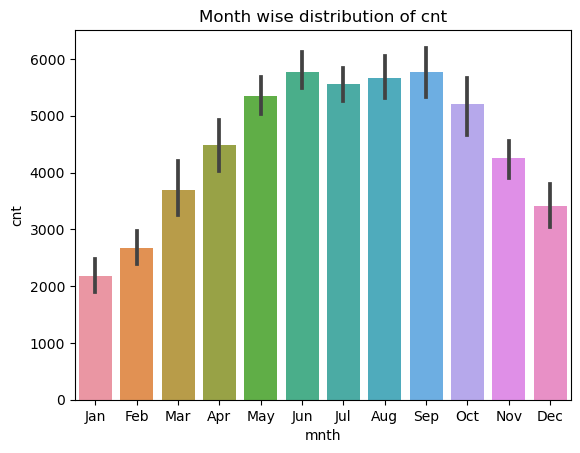

In [23]:
sns.barplot(data=boombikes, x="mnth", y="cnt")
plt.title("Month wise distribution of cnt")
plt.show()

### Insights:
- We mapped the month names under "mnth" variable.
- We can observe that rider count trend increased in the month of may, june, july, august and september.
- Again we can see drop trend from october month.

In [24]:
# Anlysing holiday variable:
boombikes.holiday.value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [25]:
# mean count in holiday:
boombikes.groupby(by="holiday").cnt.mean()

holiday
0    4530.90268
1    3735.00000
Name: cnt, dtype: float64

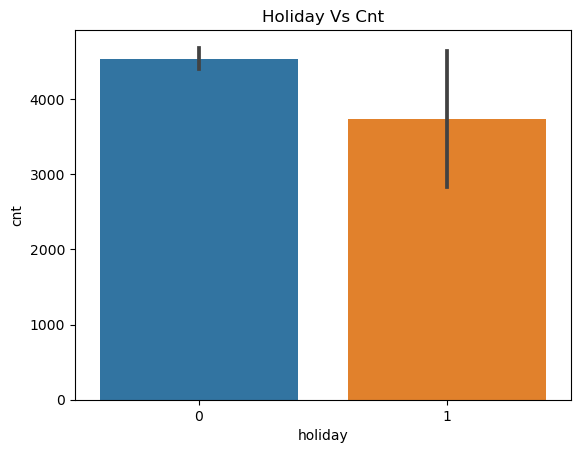

In [26]:
# Visualisation of holiday Vs cnt:
sns.barplot(data=boombikes, x="holiday", y="cnt")
plt.title("Holiday Vs Cnt")
plt.show()

### Insights:
- There is slight difference in rider count during holidays
- Mean count is higher when it is non holiday.

In [27]:
# Analysing weekday variable:
boombikes.weekday.value_counts()

1    105
2    105
3    104
4    104
5    104
6    104
0    104
Name: weekday, dtype: int64

In [28]:
# Mapping the categorical variable:
boombikes["weekday"] = boombikes["weekday"].map({0:"sun",1:"mon",2:"tue",3:"wed",4:"thu",5:"fri",6:"sat"})
boombikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,mon,1,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,tue,1,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,wed,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,thu,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,fri,1,1,9.305237,11.46350,43.6957,12.522300,1600


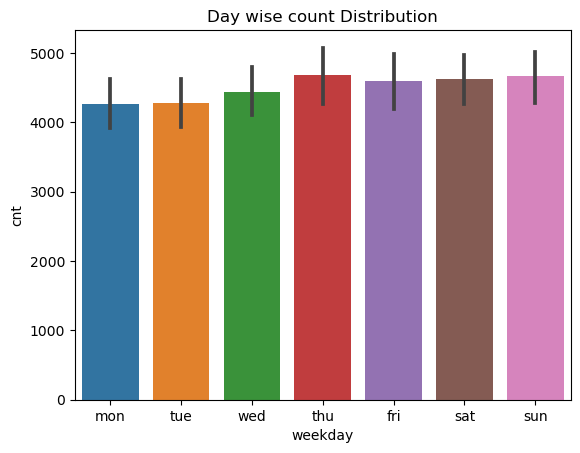

In [29]:
# ploting:
sns.barplot(data=boombikes, x="weekday", y="cnt")
plt.title("Day wise count Distribution")
plt.show()

### Insights:
- Mapped days under weekday variable for better understanding and analysing.
- There is not much change in the rider count day to day.

In [30]:
# Analysing workingday variable:
boombikes.workingday.value_counts()

1    504
0    226
Name: workingday, dtype: int64

In [31]:
boombikes.groupby(by="workingday").cnt.mean()

workingday
0    4587.862832
1    4472.198413
Name: cnt, dtype: float64

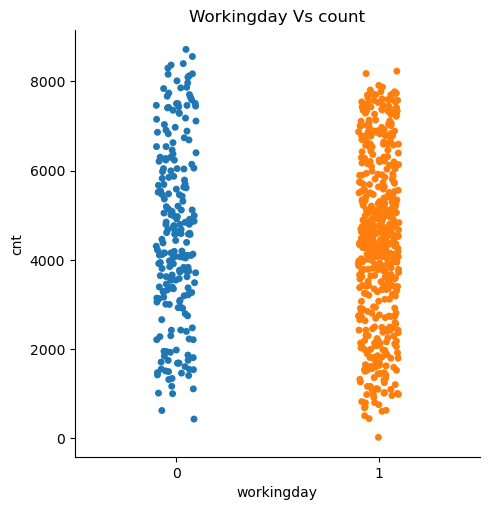

In [32]:
# plot
sns.catplot(data=boombikes, x="workingday", y="cnt")
plt.title("Workingday Vs count")
plt.show()

### Insights:
- Ride count in working days is similar to non working days.
- There is only slight change in number of rides.

In [33]:
# Analysing "weathersit" variable: 
boombikes.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [34]:
# Mapping weathersit categorical values
boombikes["weathersit"] = boombikes["weathersit"].map({1:"Clean", 2:"Mist", 3:"Light_snow", 4:"Heavy_rain"})

In [35]:
boombikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,mon,1,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,tue,1,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,wed,1,Clean,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,thu,1,Clean,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,fri,1,Clean,9.305237,11.46350,43.6957,12.522300,1600


In [37]:
# Mean count:
boombikes.groupby(by="weathersit").cnt.mean()

weathersit
Clean         4876.786177
Light_snow    1803.285714
Mist          4044.813008
Name: cnt, dtype: float64

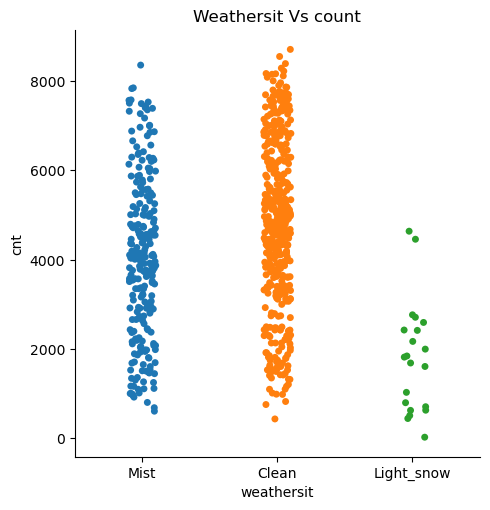

In [38]:
# Plot
sns.catplot(data=boombikes, x="weathersit", y="cnt")
plt.title("Weathersit Vs count")
plt.show()

### Insights:
- We have mapped weathersit with variable names for better understanding and analysing.
- There are 4 weathersit conditions namely clean, Mist, Light snow, Heavy rain.
- We can observe that there is no heavy rain condition in the given data.
- Demand for bike sharing is low in Light snow and hight demand in mist and clean weathersit.

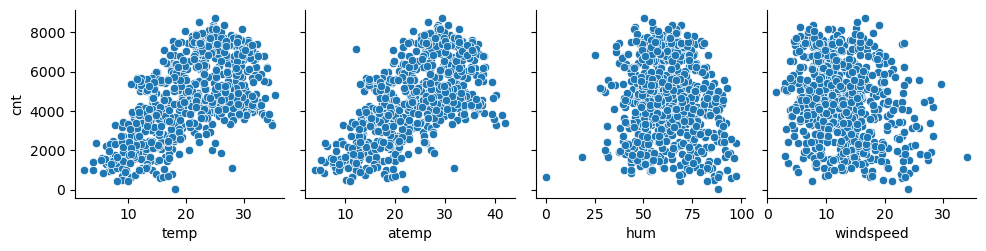

In [39]:
# Analysing Numarical variables
sns.pairplot(data=boombikes, x_vars=["temp", "atemp","hum","windspeed"], y_vars=["cnt"])
plt.show()

In [40]:
num_var_corr = boombikes[["temp", "atemp","hum","windspeed"]].corr()
num_var_corr

,temp,atemp,hum,windspeed
temp,1.000000,0.991696,0.128565,-0.158186
atemp,0.991696,1.000000,0.141512,-0.183876
hum,0.128565,0.141512,1.000000,-0.248506
windspeed,-0.158186,-0.183876,-0.248506,1.000000


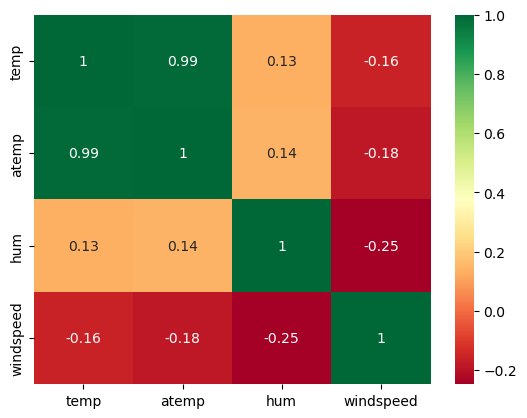

In [41]:
sns.heatmap(num_var_corr, annot=True, cmap="RdYlGn")
plt.show()

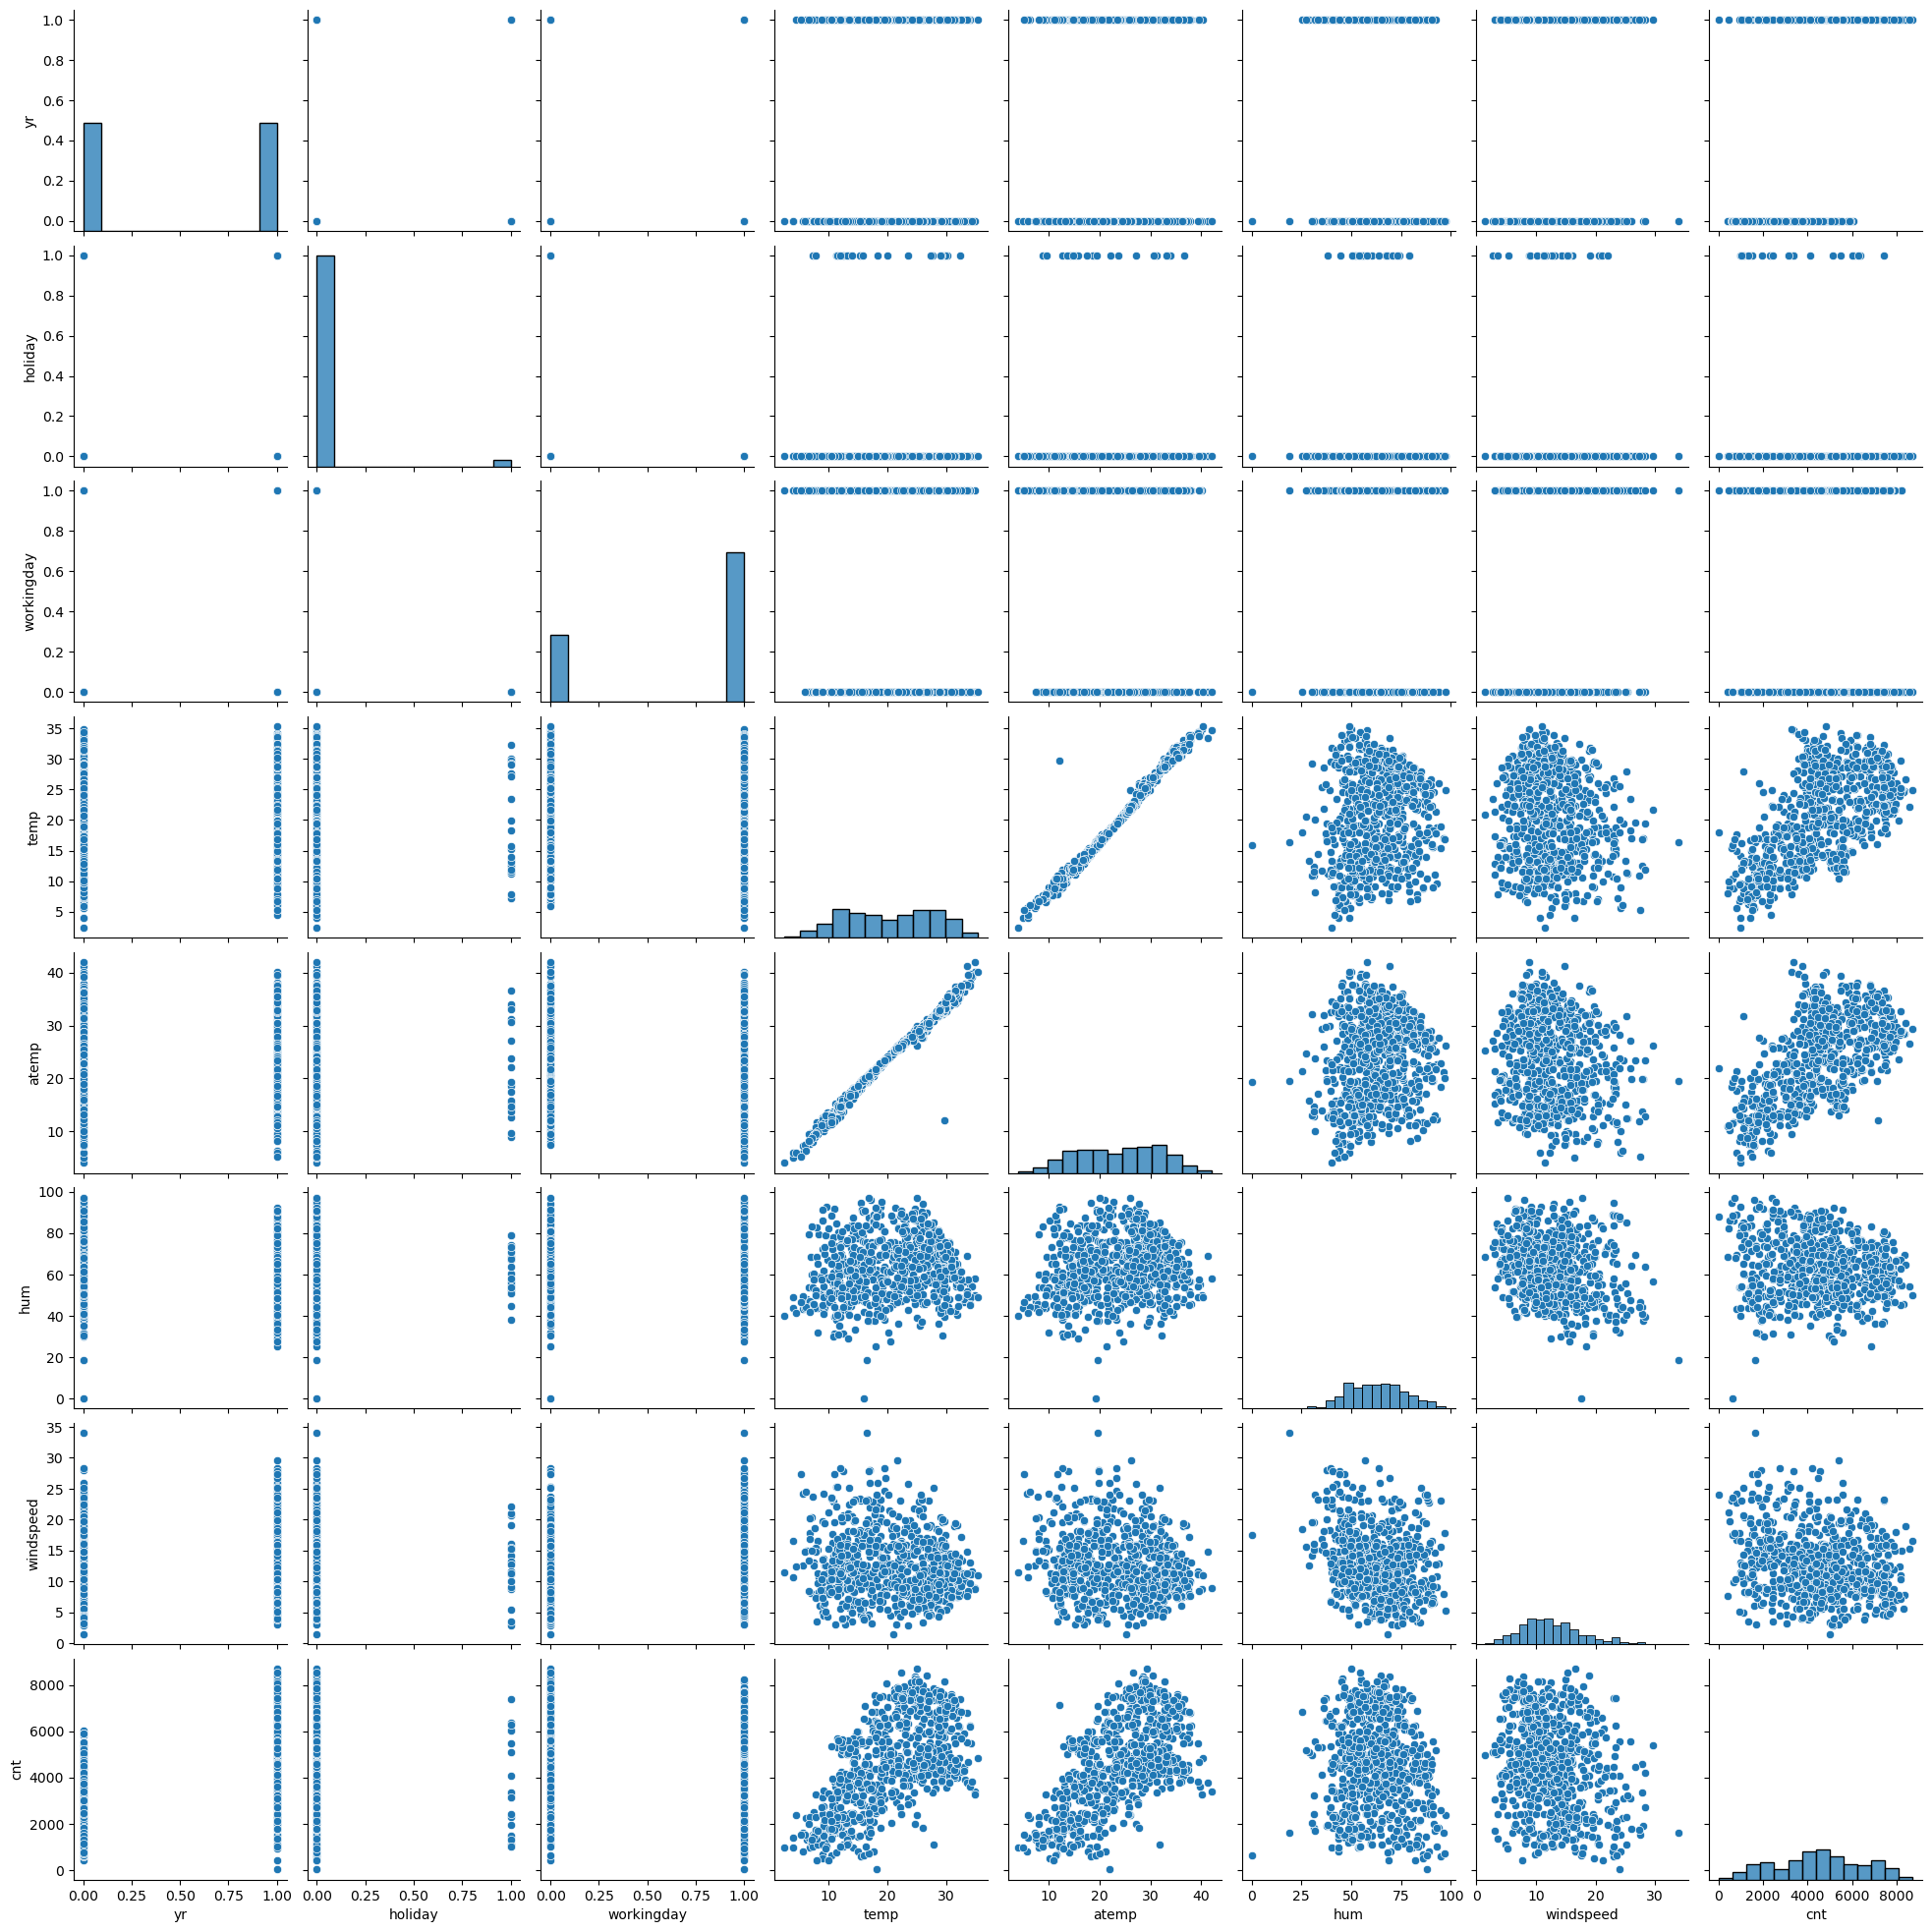

In [42]:
sns.pairplot(boombikes)
plt.show()

### Insights:
- We can see a high correlation between **'temp'** and **'atemp'**.
- The correlation between temp and atemp is 0.99 which is very high.
- One variable can be explained by another variable. 
- We can drop one of the variable for accurate results.

In [43]:
# Droping the "atemp" variable:
boombikes = boombikes.drop("atemp",1)

In [44]:
# Reading the data:
boombikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,mon,1,Mist,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,tue,1,Mist,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,wed,1,Clean,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,thu,1,Clean,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,fri,1,Clean,9.305237,43.6957,12.522300,1600


- Now we will create dummy variables for categorical variables for better insights.
- Dummy variables can help us determine the proper results which are affecting the target variables.

In [45]:
# Creating dummy variables for categorical variable:
dummy_var_cols = ["season", "mnth", "weekday","weathersit"]

In [46]:
dummydata = pd.get_dummies(boombikes[dummy_var_cols], drop_first= True)
dummydata.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snow,weathersit_Mist
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
# Concatinating with original data:

boombikes = pd.concat([boombikes, dummydata], axis=1)
boombikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,mnth_Oct,mnth_Sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snow,weathersit_Mist
0,spring,0,Jan,0,mon,1,Mist,14.110847,80.5833,10.749882,...,0,0,1,0,0,0,0,0,0,1
1,spring,0,Jan,0,tue,1,Mist,14.902598,69.6087,16.652113,...,0,0,0,0,0,0,1,0,0,1
2,spring,0,Jan,0,wed,1,Clean,8.050924,43.7273,16.636703,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,Jan,0,thu,1,Clean,8.200000,59.0435,10.739832,...,0,0,0,0,0,1,0,0,0,0
4,spring,0,Jan,0,fri,1,Clean,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,0,0,0


In [48]:
# Droping categorical variables after creating the dummy variables:
boombikes = boombikes.drop(columns=["season", "mnth", "weekday","weathersit"])

In [49]:
# Reading data head:
boombikes.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snow,weathersit_Mist
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
# Shape of the Data:
boombikes.shape

(730, 29)

### Insights:
- We have analysed all the variables and took necessary actions.
- we have total 730 rows and 29 columns available in our current module.
- Now our data is ready for test and train.

## Model Building

## Spliting Data into train and test data

In [51]:
np.random.seed(0)
df_train, df_test = train_test_split(boombikes, train_size=0.7, test_size=0.3, random_state=100)

In [52]:
# Train data head:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snow,weathersit_Mist
653,1,0,1,19.201653,55.8333,12.208807,7534,0,0,1,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,29.246653,70.4167,11.083475,7216,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,16.980847,62.1250,10.792293,4066,1,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,10.489153,48.3333,23.500518,1796,1,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,15.443347,48.9583,8.708325,4220,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [53]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snow,weathersit_Mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,20.102429,63.112926,12.831318,4486.382353,0.243137,0.245098,0.24902,...,0.086275,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.343137
std,0.500429,0.157763,0.453386,7.431169,14.156632,5.291832,1952.158739,0.429398,0.430568,0.43287,...,0.281045,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475223
min,0.000000,0.000000,0.000000,2.424346,0.000000,2.834381,22.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.606865,52.270825,9.041918,3120.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,20.209597,63.437500,12.083182,4530.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.615847,73.250025,15.750879,5973.500000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,35.328347,97.041700,34.000021,8714.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- Rescalling is required for some variables to get accurate results.

## ReScaling the Features

In [54]:
# ReScalling using MinMax scaling:
from sklearn.preprocessing import MinMaxScaler

In [55]:
scaler = MinMaxScaler()

In [56]:
# ReScalling:
df_vars = ["temp","hum","windspeed","cnt"]
df_train[df_vars]= scaler.fit_transform(df_train[df_vars])

In [58]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snow,weathersit_Mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.086275,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.343137
std,0.500429,0.157763,0.453386,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.281045,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [61]:
df_train.shape

(510, 29)

In [59]:
df_train.corr()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snow,weathersit_Mist
yr,1.000000,-0.014980,-0.003005,0.107288,-0.084792,-0.001108,0.591508,-0.036320,0.013856,-0.022638,...,-0.018790,0.002574,-0.033817,-0.017733,0.016537,0.032785,0.026024,0.010995,-6.076399e-02,-0.015469
holiday,-0.014980,1.000000,-0.254149,-0.066282,-0.029093,0.017569,-0.095961,0.053339,-0.063232,0.050712,...,-0.005387,0.043692,-0.069242,-0.025291,-0.028355,-0.066102,0.034971,0.190636,-2.815377e-02,-0.038279
workingday,-0.003005,-0.254149,1.000000,-0.007643,0.020701,-0.002504,-0.008723,-0.032886,0.030488,0.036097,...,0.025939,-0.034746,0.272446,-0.605864,-0.626783,0.260091,0.234321,0.163120,8.289412e-03,-0.068924
temp,0.107288,-0.066282,-0.007643,1.000000,0.155415,-0.187396,0.643517,-0.605988,0.125582,-0.233697,...,-0.018709,0.207457,-0.037708,0.025276,0.006854,0.074973,-0.001951,-0.046291,-3.609266e-02,-0.090161
hum,-0.084792,-0.029093,0.020701,0.155415,1.000000,-0.266895,-0.059993,-0.201134,-0.013216,0.171579,...,0.162014,0.152628,-0.030499,0.002783,-0.027388,-0.056997,0.033548,0.026395,2.450381e-01,0.481042
windspeed,-0.001108,0.017569,-0.002504,-0.187396,-0.266895,1.000000,-0.253794,0.180743,0.110089,-0.090649,...,-0.018973,-0.121734,0.035390,-0.016284,0.018278,-0.021502,0.035616,-0.057518,8.689990e-02,-0.030385
cnt,0.591508,-0.095961,-0.008723,0.643517,-0.059993,-0.253794,1.000000,-0.548871,0.134343,0.032636,...,0.065692,0.201327,-0.071188,0.012496,0.031237,0.110430,-0.018885,-0.019578,-2.265984e-01,-0.175530
season_spring,-0.036320,0.053339,-0.032886,-0.605988,-0.201134,0.180743,-0.548871,1.000000,-0.322955,-0.326377,...,-0.174161,-0.167580,0.010007,-0.000641,0.013022,-0.048931,-0.012251,0.002987,-4.455809e-02,0.013970
season_summer,0.013856,-0.063232,0.030488,0.125582,-0.013216,0.110089,0.134343,-0.322955,1.000000,-0.328116,...,-0.175089,-0.168473,-0.017169,-0.002397,-0.015325,0.066484,-0.001490,-0.012151,-4.523062e-02,0.039442
season_winter,-0.022638,0.050712,0.036097,-0.233697,0.171579,-0.090649,0.032636,-0.326377,-0.328116,1.000000,...,0.533619,-0.020175,0.016635,-0.019389,-0.032037,-0.054098,0.045054,0.050608,1.144484e-01,0.023127


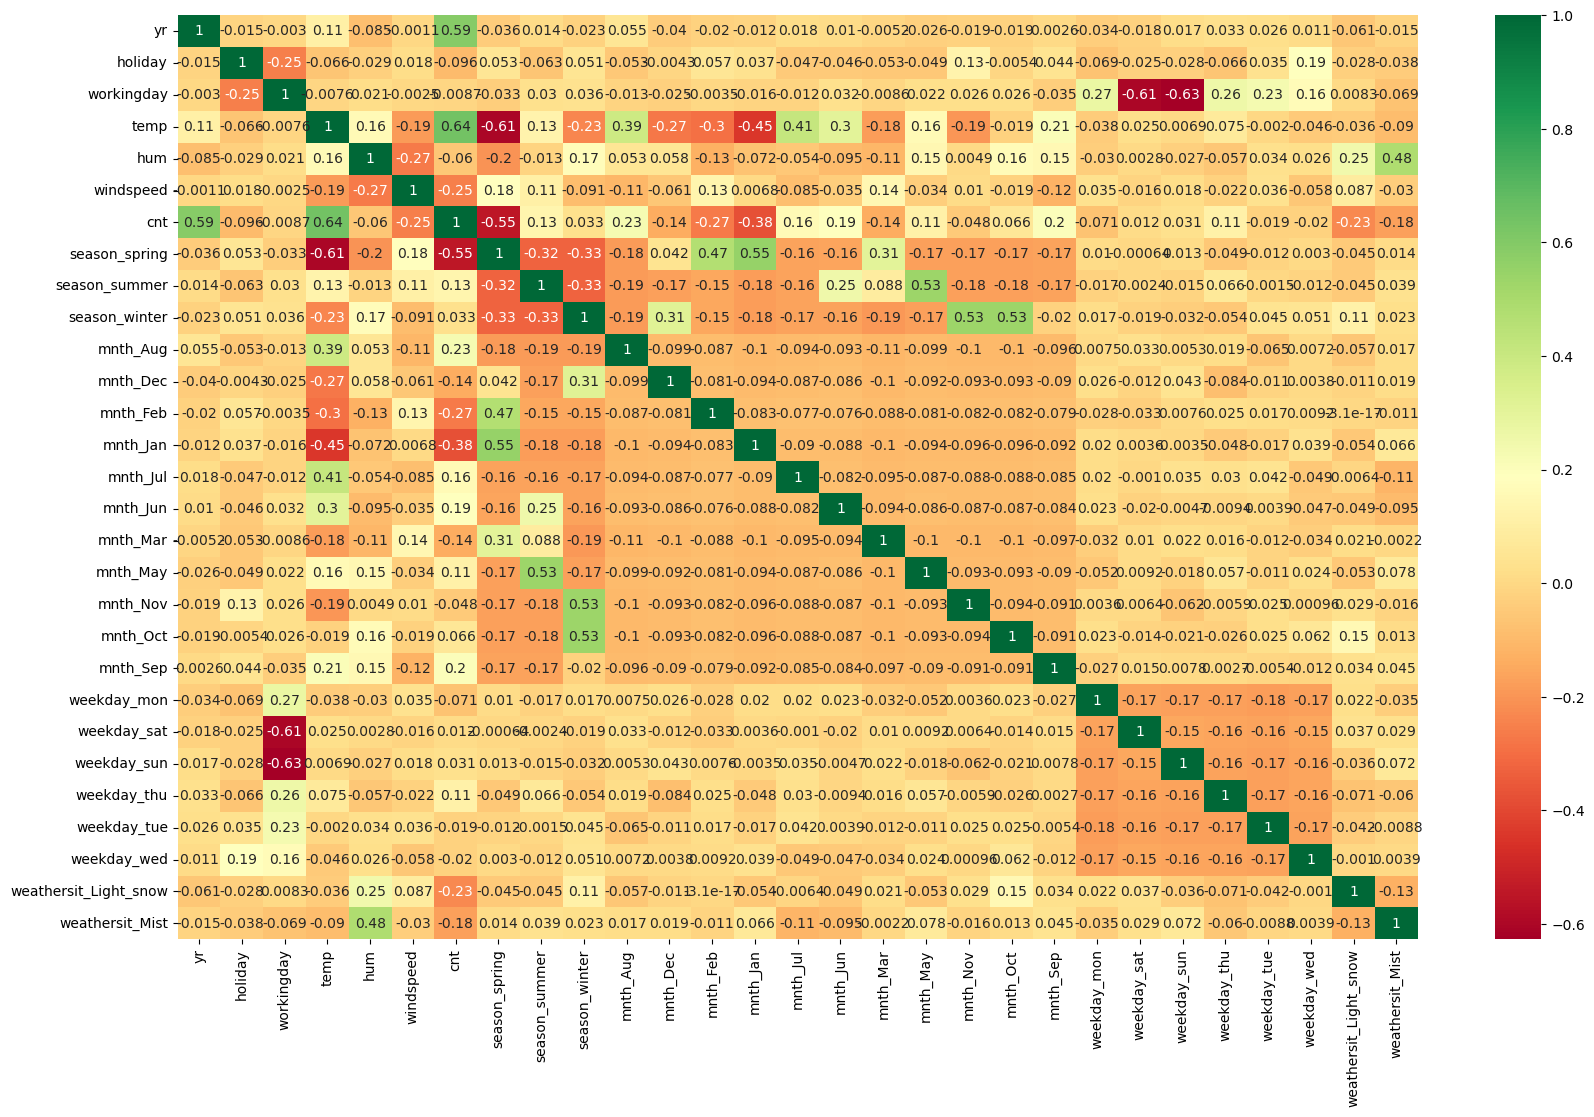

In [60]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (20, 12))
sns.heatmap(df_train.corr(), annot = True, cmap="RdYlGn")
plt.show()

### Insights:
- We have divided the train and test data in the ratio of 0.70 and 0.30 respectively.
- ReScalling has been done for accurate results.
- Looking at the correlation. Target variable **"cnt"** is highly correlated with the independent variables **'yr'** and **'temp'**.

## Building a Linear Module

## Module 1

In [62]:
# Dividing into X and Y sets for the model building
Y_train = df_train.pop("cnt")
X_train = df_train

In [63]:
# Building the module using RFE
lm = LinearRegression()
lm.fit(X_train , Y_train)

rfe = RFE(lm, n_features_to_select=15)

rfe = rfe.fit(X_train, Y_train)

In [64]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 9),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', False, 2),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 13),
 ('mnth_Mar', False, 14),
 ('mnth_May', False, 6),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 11),
 ('mnth_Sep', True, 1),
 ('weekday_mon', False, 8),
 ('weekday_sat', False, 4),
 ('weekday_sun', False, 5),
 ('weekday_thu', False, 12),
 ('weekday_tue', False, 7),
 ('weekday_wed', False, 10),
 ('weathersit_Light_snow', True, 1),
 ('weathersit_Mist', True, 1)]

In [65]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_Dec', 'mnth_Jan', 'mnth_Jul',
       'mnth_Nov', 'mnth_Sep', 'weathersit_Light_snow', 'weathersit_Mist'],
      dtype='object')

In [66]:
X_train.columns[~rfe.support_]

Index(['workingday', 'mnth_Aug', 'mnth_Feb', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Oct', 'weekday_mon', 'weekday_sat', 'weekday_sun',
       'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

In [67]:
X_train_rfe = X_train[col]

In [68]:
# adding constant:
X_train_rfe = sm.add_constant(X_train_rfe)

In [69]:
# model fitting:
lm = sm.OLS(Y_train,X_train_rfe).fit()

In [70]:
# summary:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Tue, 27 Jun 2023   Prob (F-statistic):          3.34e-189
Time:                        19:38:16   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.32

In [71]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,82.48
6,season_spring,5.27
3,temp,4.42
8,season_winter,3.83
7,season_summer,2.76
4,hum,1.93
12,mnth_Nov,1.76
10,mnth_Jan,1.68
15,weathersit_Mist,1.57
9,mnth_Dec,1.49


### Insights:
- After obersving the module. We have got R squared = 0.845 and Adj R-squared = 0.841.
- Most of the features have low P values and also low VIF.
- We will drop the features which are having high P value and High VIF one by one to build better module.
- 1st we will drop **'season_spring'** which is having high VIF.

In [72]:
## Droping the feature:
X = X_train_rfe.drop("season_spring",1)

In [73]:
X.shape

(510, 15)

## Module 2

In [74]:
# adding constant and fitting model:
X_train_rfe = sm.add_constant(X)
lr2 = sm.OLS(Y_train, X_train_rfe).fit()

In [75]:
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Tue, 27 Jun 2023   Prob (F-statistic):          1.54e-188
Time:                        19:40:56   Log-Likelihood:                 510.40
No. Observations:                 510   AIC:                            -990.8
Df Residuals:                     495   BIC:                            -927.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.25

In [76]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,51.75
3,temp,2.32
7,season_winter,2.08
4,hum,1.90
11,mnth_Nov,1.70
9,mnth_Jan,1.67
14,weathersit_Mist,1.55
8,mnth_Dec,1.47
6,season_summer,1.44
10,mnth_Jul,1.43


### Insights:
- After obersving the module. We have got R squared = 0.843 and Adj R-squared = 0.838.
- Most of the features have low P values and also low VIF.
- Now we will drop 'mnth_Nov' which is having high P value.

In [77]:
# Droping variable:
X = X.drop("mnth_Nov",1)

## Module 3

In [78]:
# Building module:
X_train_rfe = sm.add_constant(X)
lr3 = sm.OLS(Y_train,X_train_rfe).fit()
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.3
Date:                Tue, 27 Jun 2023   Prob (F-statistic):          4.25e-189
Time:                        19:43:44   Log-Likelihood:                 508.96
No. Observations:                 510   AIC:                            -989.9
Df Residuals:                     496   BIC:                            -930.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.24

In [79]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,50.82
3,temp,2.25
4,hum,1.90
9,mnth_Jan,1.63
7,season_winter,1.55
13,weathersit_Mist,1.55
6,season_summer,1.43
10,mnth_Jul,1.43
8,mnth_Dec,1.26
12,weathersit_Light_snow,1.25


### Insights:
- After droping mnth_Nov we can see change in P values and VIFs.
- Now, based on P value we will drop mnth_Dec and build module again. 

In [80]:
# Droping variable:
X = X.drop("mnth_Dec",1)

## Module 4

In [81]:
# Building module:
X_train_rfe = sm.add_constant(X)
lr4 = sm.OLS(Y_train,X_train_rfe).fit()
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     219.8
Date:                Tue, 27 Jun 2023   Prob (F-statistic):          6.03e-190
Time:                        19:46:33   Log-Likelihood:                 508.17
No. Observations:                 510   AIC:                            -990.3
Df Residuals:                     497   BIC:                            -935.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.24

In [82]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,49.60
3,temp,2.06
4,hum,1.88
8,mnth_Jan,1.55
12,weathersit_Mist,1.55
7,season_winter,1.53
9,mnth_Jul,1.43
6,season_summer,1.41
11,weathersit_Light_snow,1.24
5,windspeed,1.19


### Insights:
- Module improved well and P value and VIF are better.
- I can observe 'mnth_Jan' having P value of 0.031.
- Based on the P value we will drop **'mnth_Jan'** and build module again for module improvement.

In [83]:
# Droping variable:
X = X.drop("mnth_Jan",1)

## Module 5

In [84]:
# Building module:
X_train_rfe = sm.add_constant(X)

lr5 = sm.OLS(Y_train,X_train_rfe).fit()
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     237.6
Date:                Tue, 27 Jun 2023   Prob (F-statistic):          3.89e-190
Time:                        19:49:51   Log-Likelihood:                 505.78
No. Observations:                 510   AIC:                            -987.6
Df Residuals:                     498   BIC:                            -936.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.22

In [85]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,44.99
4,hum,1.87
3,temp,1.60
11,weathersit_Mist,1.55
8,mnth_Jul,1.43
6,season_summer,1.33
7,season_winter,1.29
10,weathersit_Light_snow,1.24
9,mnth_Sep,1.19
5,windspeed,1.18


### Insights:
- In this module we can clearly see that P values and VIF are in good level.
- There is no multicolinearity.
- We will go ahead with this module lr5.

## Residual Analysis of the train data

In [86]:
Y_train_cnt = lr5.predict(X_train_rfe)

Text(0.5, 0, 'Errors')

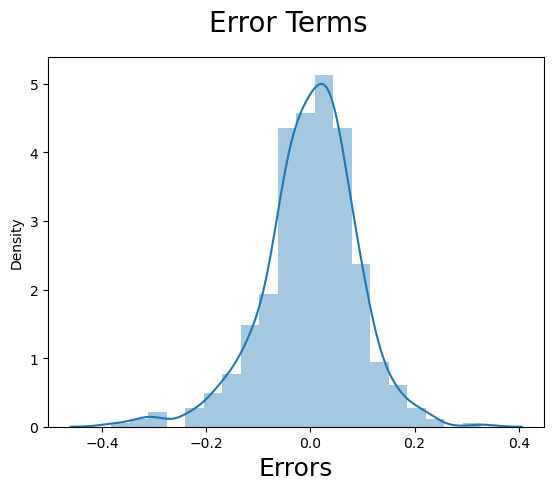

In [87]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((Y_train - Y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)          
plt.xlabel('Errors', fontsize = 18)  

- Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final model.

## Making Predictions Using the Final Model

Applying the scaling on the test sets

In [88]:
df_vars = ["temp","hum","windspeed","cnt"]
df_test[df_vars] = scaler.transform(df_test[df_vars])

In [89]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snow,weathersit_Mist
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.558941,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,...,0.082192,0.086758,0.118721,0.173516,0.155251,0.141553,0.123288,0.155251,0.027397,0.319635
std,0.500722,0.188034,0.481313,0.233698,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,...,0.275286,0.282125,0.324202,0.379560,0.362974,0.349389,0.329520,0.362974,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [90]:
# Dividing into X_test and y_test
Y_test = df_test.pop('cnt')
X_test = df_test

In [91]:
# Adding constant:
X_test_m5 = sm.add_constant(X_test)

In [92]:
X_test_m5 = X_test_m5[X.columns]

In [93]:
X_test_m5 = sm.add_constant(X_test_m5)

In [94]:
# Making predictions
Y_pred = lr5.predict(X_test_m5)

## Model Evaluation 

Text(0, 0.5, 'Y_pred')

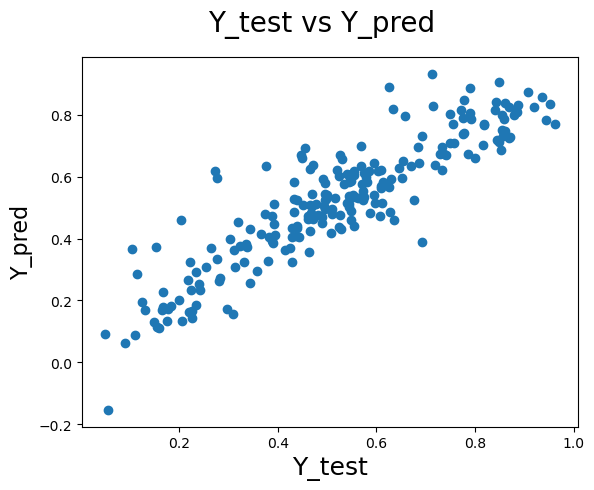

In [95]:
fig = plt.figure()
plt.scatter(Y_test, Y_pred)
fig.suptitle('Y_test vs Y_pred', fontsize = 20)             
plt.xlabel('Y_test', fontsize = 18)                       
plt.ylabel('Y_pred', fontsize = 16)

### R-squared score on the test set:

In [96]:
## R^2 
r2 =r2_score(Y_test, Y_pred)
r2

0.8043855040518023

In [97]:
X_test_m5.shape

(219, 12)

In [98]:
n = X_test_m5.shape[0]
p = X_test_m5.shape[1]

In [99]:
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.792990484870354

## Final Interpretations:
- We have got R-squared values on test and train data:
    - Train R-squared = 0.840
    - Test R-squared = 0.804
- Adjusted R-squared for test and train data:
    - Train Adjusted R-squared = 0.836
    - Test Adjusted R-squared = 0.792
    
- Significant values to predict the bike sharing demand are:
    - 'temp', 'yr', 'holiday', 'hum','windspeed','season_summer','season_winter', 'mnth_July and mnth_Sep', 'weathersit_Light_snow', 'weathersit_Mist'. 

- Temperature, year, summer season, winter season and September month are positively affecting the demand for bike sharing. 
- Holiday , humidity, wind speed , July month , Light_snow, Mist are affecting negatively on the demand for shared bikes.
- Increase in temperature can increase in demand by 0.5978 units.
- Year wise coefficient value indicated 0.2279 change in demand.
- summer season and winter season coefficients are 0.0803 and 0.1357 respectively
- September month coefficient 0.0959 indicated positive affact in demand.